In [127]:
import ssl
import urllib
context = ssl._create_unverified_context()
from urllib.request import Request, urlopen
import json
from io import StringIO
import pandas as pd

In [128]:
from itertools import cycle
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [129]:
# Define scale factors
## get from module
def get_scale_factor(unit):
    BARN_CM2= 1e-24

    if (unit == "b"):
        return BARN_CM2
    elif (unit == "mb"):
        return 1e-3*BARN_CM2
    elif (unit == "ub"):
        return 1e-6*BARN_CM2
    elif (unit == "nb"):
        return 1e-9*BARN_CM2
    elif (unit == "pb"):
        return 1e-12*BARN_CM2
    elif (unit == "fb"):
        return 1e-15*BARN_CM2
    elif (unit == "ab"):
        return 1e-18*BARN_CM2
    elif (unit == "zb"):
        return 1e-21*BARN_CM2
    elif (unit == "yb"):
        return 1e-24*BARN_CM2
    elif (unit in ("cm2","cm^2"):
        return 1
    else:
        ## assume variant of cm^2
        return 1

In [130]:
def create_request_header(dmtool_userid_in,dmtool_apikey_in ):
    request_header_out = {'Content-Type': 'application/json', 'dmtool-userid': dmtool_userid_in ,'dmtool-apikey': dmtool_apikey_in}
    return request_header_out
#request_header = create_request_header('1','' )
#E84EE09A_481E_11EF_AE91_B68546A84337

In [131]:
## to use library
dmtool_userid = '1'
dmtool_apikey = ''
## DMToolsClient1 = DMToolsClient(dmtool_userid, dmtool_apikey)
## then use DMToolsClient1.request_header

In [132]:
#api_server = "https://dmtools.brown.edu/"
#data_api = "dmtool/fastapi_data/open/data/"
#fastapi_url_limit_displays = api_server + data_api + "read_all_limit_display/"

In [133]:
def read_all_limit_display(request_header_in):
    api_server = "https://dmtools.brown.edu/"
    data_api = "dmtool/fastapi_data/open/data/"
    fastapi_url_limit_displays = api_server + data_api + "read_all_limit_display/"
    request = Request(fastapi_url_limit_displays, headers=request_header_in)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    all_limit_display_json_obj = json.loads(string)
    #all_plots_json_obj[1]
    all_data_df_ret = pd.DataFrame(all_limit_display_json_obj)
    return all_data_df_ret

all_limit_display_df = read_all_limit_display(request_header)

In [134]:
combos = all_limit_display_df[['color','style']].drop_duplicates()
style_list = all_limit_display_df['style'].drop_duplicates().tolist()
color_list = all_limit_display_df['color'].drop_duplicates().tolist()

In [135]:
## Checking Translations

In [136]:
style_list = ['line', 'dash', 'fill', 'dot', 'hex', 'asterisk', 'tril', 'plus',
 'cross', 'circle', 'trid', 'pent', 'triu', 'trir', 'point']

In [137]:
color_list_plots = ['k', 'r', 'dkg', 'ltg', 'ltr', 'b', 'ltb', 'c', 'g10', 'g20', 'dkb', 'dkr', 'g', 'm', 'g60', 'g80', 'g90',
 'g30', 'y', 'g50', 'g70', 'g40', 'w']

color_list_default = ['LtR', 'LtB', 'DkR', 'DkG', 'Blue', 'k', 'DkB', 'Red', 'Grn', 'Mag', 'LtG', 'Blk', 'G60', 'Cyan']

In [138]:
#fastapi_url_all_data = api_server + data_api + "read_all_data/"
#request = Request(fastapi_url_all_data, headers=request_header)
#r = urllib.request.urlopen(request, context=context)
#string = r.read().decode('utf-8')
#all_data_display_json_obj = json.loads(string)
#all_plots_json_obj[1]
#all_data_display_json_obj

In [139]:
#all_data_df = pd.DataFrame(all_data_display_json_obj)
#style_list = all_data_df['default_style'].drop_duplicates().tolist()
#color_list = all_data_df['default_color'].drop_duplicates().tolist()
#color_list

In [140]:
#style_list

In [141]:
## This Trace Class creates a Dictionary that can then be added directly to the plot

In [142]:
class TraceClass():
    def __init__(self):
      self.mode = 'lines' ### ['lines', 'lines+markers', 'markers']
      self.line = {'color' :'red', 'width': 1, 'dash' : 'solid'}
      self.marker = {'symbol':'x'}
      self.fillcolor = 'rgba(0,255,255,0.05)'
      self.opacity = 1
      self.fill = 'toself'

    def color_rgba(self, color_in):
      if color_in == 'cyan':
          self.fillcolor = 'rgba(0,255,255,0.05)'
      elif color_in == 'red':
          self.fillcolor = 'rgba(255,0,0,0.05)'
      elif color_in == 'blue':
          self.fillcolor = 'rgba(0,0,255,0.05)'
      elif color_in == 'green':
          self.fillcolor = 'rgba(0,255,0,0.05)'
      elif color_in == 'black':
          self.fillcolor = 'rgba(0,0,0,0.05)'
      elif color_in == 'magenta':
          self.fillcolor = 'rgba(255,0,255,0.05)'
      elif color_in == 'yellow':
          self.fillcolor = 'rgba(255,255,0,0.05)'
      elif color_in == 'white':
          self.fillcolor = 'rgba(255,255,255,0.05)'
      else:
          self.fillcolor = 'rgba(255,0,0,0.05)'

    def clean_the_color_in(self, color_in):
        if color_in in ('k', 'black', 'Blk'):
            return 'black'
        elif color_in in ('r', 'red', 'Red'):
            return 'red'
        elif color_in in  ('dkg','DkG', 'green', 'Grn'):
            return 'green'
        elif color_in in  ('ltg', 'LtG'):
            return 'green'
        elif color_in in ('LtR', 'ltr'):
            return 'red'
        elif color_in in  ('b'):
            return 'blue'
        elif color_in in  ('LtB','ltb', 'Blue'):
            return 'blue'
        elif color_in in  ('c', 'Cyan'):
            return 'cyan'
        elif color_in in ('g10','g20','g30','g40','g50','g60','g70','g80','g90', 'G60'):
            return 'grey'
        elif color_in in ('blue', 'dkb', 'DkB'):
            return 'blue'
        elif color_in in ('red','dkr'):
            return 'red'
        elif color_in in ('g', 'grey'):
            return 'grey'
        elif color_in in ('m', 'magenta', 'Mag'):
            return 'magenta'
        elif color_in in ('y', 'yellow'):
            return 'yellow'
        elif color_in in ('w', 'white'):
           return 'white'
        else :
            return 'purple'

    def set_values(self, color_in, style_in):
        cleaned_color = self.clean_the_color_in(color_in)
        if style_in in ('dot', 'dotted', 'Dot'):
            self.mode = 'lines' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'x'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in in ('dash', 'Dash'):
            self.mode = 'lines' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'dash'}
            self.marker = {'symbol':'x'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in in ('fill', 'Fill'):
            self.mode = 'lines' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'x'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'toself'
        elif style_in in ('Line', 'line', 'lines'):
            self.mode = 'lines' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'x'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in == "point":
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'x-dot'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'toself'
        elif style_in in ('cross', 'Cross'):
            #self.style = 'cross'
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.line_width = 1
            self.marker = {'symbol':'cross'}
            self.opacity = 1
            self.fill = 'none'
        elif style_in ==  "circle":
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'circle'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in ==  "plus":
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'square-cross'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'toself'
        elif style_in in ("asterisk",'star'):
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'star'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in in ('pentagon', "pent"):
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'pentagon'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'toself'
        elif style_in == ("hex", 'hexagon'):
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'hexagon'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in == ("triu", 'triangle'):
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'triangle-up'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in ==  "trid":
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'triangle-down'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'toself'
        elif style_in ==  "tril":
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'triangle-left'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        elif style_in ==  "trir":
            self.mode = 'lines+markers' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'triangle-right'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'
        else:
            self.mode = 'lines' ### ['lines', 'lines+markers', 'markers']
            self.line = {'color' :cleaned_color, 'width': 1, 'dash' : 'solid'}
            self.marker = {'symbol':'x'}
            _rgba = self.color_rgba(cleaned_color)
            self.fillcolor = _rgba
            self.opacity = 1
            self.fill = 'none'





In [143]:
## test the class
style_list = ['line', 'dash', 'fill', 'dot', 'hex', 'asterisk', 'tril', 'plus',
 'cross', 'circle', 'trid', 'pent', 'triu', 'trir', 'point']

color_list = ['LtR', 'LtB', 'DkR', 'DkG', 'Blue', 'k', 'DkB', 'Red', 'Grn', 'Mag', 'LtG', 'Blk', 'G60', 'Cyan']


fig_chart_test = go.Figure(
        data=[go.Scatter(x=[], y=[])]
    )
tc = TraceClass()

for sl in style_list:
    color_in = 'k'
    style_in = sl
    tc.set_values(color_in, style_in)
    #tc.set_trace_style('trir')
    #tc.__dict__

    fig_chart_test.add_trace(go.Scatter(tc.__dict__,x=[1],y=[2],name='name'))


In [144]:
#from x import TraceClass
#tc = TraceClass()

In [145]:
tc.__dict__

{'mode': 'lines+markers',
 'line': {'color': 'black', 'width': 1, 'dash': 'solid'},
 'marker': {'symbol': 'x-dot'},
 'fillcolor': None,
 'opacity': 1,
 'fill': 'toself',
 'line_width': 1}

In [146]:
tc_in = {'mode': 'lines+markers',
 'line': {'color': 'black', 'width': 1, 'dash': 'dash'},
 'marker': {'symbol': 'blah'},
 'fillcolor': None,
 'opacity': 1,
 'fill': 'none'}
#fig_chart_test.add_trace(go.Scatter(tc_in,x=[1],y=[2],name='name'))

In [147]:
def read_a_data(id_in, request_header_in):
    api_server = "https://dmtools.het.brown.edu/"
    data_api = "dmtool/fastapi_data/open/data/"
    fastapi_url_data = api_server + data_api + "read_a_data/?id_in="+ str(id_in)
    request = Request(fastapi_url_data, headers=request_header_in)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    a_data_json_obj_ret = json.loads(string)
    #all_plots_json_obj[1]
    #a_data_df = pd.DataFrame(a_data_json_obj, index=[0])
    return a_data_json_obj_ret
a_data_json_obj = read_a_data(1, request_header)

In [148]:
'''
id = a_data_json_obj['id']
print('id from data >>>>', id)
#print("this_dict >>>>", this_dict)
limit_id = a_data_json_obj['limit_id']
data_id = a_data_json_obj['id']
y_rescale = a_data_json_obj['y_rescale']
scale_factor = get_scale_factor(y_rescale)
data_string = a_data_json_obj['data_values']'''

'\nid = a_data_json_obj[\'id\']\nprint(\'id from data >>>>\', id)\n#print("this_dict >>>>", this_dict)\nlimit_id = a_data_json_obj[\'limit_id\']\ndata_id = a_data_json_obj[\'id\']\ny_rescale = a_data_json_obj[\'y_rescale\']\nscale_factor = get_scale_factor(y_rescale)\ndata_string = a_data_json_obj[\'data_values\']'

In [149]:
def clean_data_values(data_id_in, request_header_in):
    api_server = "https://dmtools.het.brown.edu/"
    data_api = "dmtool/fastapi_data/open/data/"
    fastapi_url_data = api_server + data_api + "read_a_data/?id_in=" + str(data_id_in)
    request = Request(fastapi_url_data, headers=request_header_in)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    a_data_json_obj = json.loads(string)
    data_string = a_data_json_obj['data_values']
    #all_plots_json_obj[1]
    #a_data_df = pd.DataFrame(a_data_json_obj, index=[0])
    data_string = data_string.replace("{[", "")
    data_string = data_string.replace("]}", "")
    #print(data_string)
    data_series = data_string.split("]")
    len(data_series)
    lol = "trace_id,x,y|"
    for l in range(0,len(data_series)):
      series_id = 0
      trace_id = l + 1
      single_set = data_series[l]
      set_list = single_set.split(";")
      for i in set_list:
          ## the following was added due to a different approach to data_string format
          r0 = i.replace(',[','')
          r1 = r0.replace('  ',' ')
          r2 = r1.replace('  ',' ')
          r3 = r2.replace('  ',' ')
          r4 = r3.replace('\r\n','')
          r5 = r4.replace('\t',' ')
          r6 = r5.replace(',',' ')
          r7 = r6.replace('  ',' ')
          r8 = r7.replace('  ',' ')
          r9 = r8.replace('\n',' ')
          r10 = r9.replace("', '"," ")
          r11 = r10.replace("['[",'')
          r12 = r11.replace(']','')
          r13 = r12.replace('[','')
          r14 = r13.replace(',','')
          s = r14.lstrip()
          z = s.split(" ");
          try:
              raw_y = z[1]
              raw_x = z[0].replace(",[", "")
              #print('print split z >>>>', z)
          except:
              #print(z)
              raw_y = '0'
              raw_x = '0'

          try:
              x = float(raw_x)
              y = float(raw_y)
              masses =  float(raw_x)
              cross_sections = float(raw_y)
              formatted_x = "{:.5e}".format(x)
              formatted_y = "{:.5e}".format(y)
              append_this = str(trace_id) + "," + formatted_x + "," + formatted_y
              lol = lol + append_this
          except:
              print('rejected z >> ', z)
          lol = lol + '|'
    #print(lol)
    # Data payload
    json_payload = {
        "data": lol
    }

    # Convert payload to JSON string
    json_payload = json.dumps(json_payload)
    bytes_payload = json_payload.encode('utf-8')
    # update the field call data
    fastapi_url_data = api_server + data_api + "update_a_data/?id_in=" + str(data_if_in)
    request = Request(fastapi_url_data, data=bytes_payload, headers=request_header_in,  method='PATCH')
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    update_a_data_json_obj = json.loads(string)
    # no return as cleaning and updating




In [150]:
def read_all_data(request_header_in):
    api_server = "https://dmtools.het.brown.edu/"
    data_api = "dmtool/fastapi_data/open/data/"
    fastapi_url_all_data = api_server + data_api + "read_all_data/"
    request = Request(fastapi_url_all_data, headers=request_header_in)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    all_data_json_obj_ret = json.loads(string)
    return all_data_json_obj_ret
all_data_json_obj = read_all_data(request_header)

In [151]:
#string_csv = StringIO(lol)
#df = pd.read_csv(string_csv,sep=",", lineterminator="|")

In [152]:
## cleaning loop
'''
for dic in all_data_json_obj:
    data_id = dic['id']
    clean_data_values(data_id, request_header)
    '''

"\nfor dic in all_data_json_obj:\n    data_id = dic['id']\n    clean_data_values(data_id, request_header)\n    "

In [153]:
## Illustrating new data string, existing data values are being retained

In [154]:
a_data_json_obj = read_a_data(255,request_header)
#all_plots_json_obj[1]
#a_data_df = pd.DataFrame(a_data_json_obj, index=[0])
data_string = a_data_json_obj['data']
#data_string
## this can be read into a dataframe in two lines of code
string_csv = StringIO(data_string)
data_data = pd.read_csv(string_csv,sep=",", lineterminator="|")
#data_data
data_string

'trace_id,x,y|1,7.00000e+00,1.97200e-40|1,8.00000e+00,1.74500e-41|1,9.00000e+00,3.99605e-42|1,1.00000e+01,1.44657e-42|1,1.10000e+01,6.88567e-43|1,1.20000e+01,3.92483e-43|1,1.30000e+01,2.53937e-43|1,1.40000e+01,1.80041e-43|1,1.50000e+01,1.36651e-43|1,2.00000e+01,6.34288e-44|1,2.50000e+01,4.82693e-44|1,3.00000e+01,4.46491e-44|1,3.50000e+01,4.47831e-44|1,4.00000e+01,4.64848e-44|1,4.50000e+01,4.90415e-44|1,5.00000e+01,5.19840e-44|1,5.50000e+01,5.52590e-44|1,6.00000e+01,5.87403e-44|1,6.50000e+01,6.23234e-44|1,7.00000e+01,6.60628e-44|1,7.50000e+01,6.98284e-44|1,8.00000e+01,7.35992e-44|1,8.50000e+01,7.74999e-44|1,9.00000e+01,8.13749e-44|1,9.50000e+01,8.53623e-44|1,1.00000e+02,8.92889e-44|1,1.10000e+02,9.72357e-44|1,1.20000e+02,1.05306e-43|1,1.30000e+02,1.13310e-43|1,1.40000e+02,1.21468e-43|1,1.50000e+02,1.29606e-43|1,1.60000e+02,1.37771e-43|1,1.70000e+02,1.45900e-43|1,1.80000e+02,1.54070e-43|1,1.90000e+02,1.62236e-43|1,2.00000e+02,1.70510e-43|1,2.10000e+02,1.78694e-43|1,2.20000e+02,1.86914e-4

In [155]:
def get_all_owned_and_open_plots(request_header_in):
    api_server = "https://dmtools.het.brown.edu/"
    data_api = "dmtool/fastapi_data/open/data/"
    fastapi_url_read_all_plots = api_server + data_api + "read_all_plot/"
    #r = requests.get(fastapi_url_plots, headers = request_header)
    request = Request(fastapi_url_read_all_plots, headers=request_header)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    all_plots_json_obj = json.loads(string)
    #all_plots_json_obj[1]
    all_plots_df_ret = pd.DataFrame(all_plots_json_obj)
    all_plots_df_ret['row_id'] = all_plots_df_ret.index
    #all_plots_df.head(10)
    return all_plots_df_ret

all_plots_df = get_all_owned_and_open_plots(request_header)
all_plots_df.columns

Index(['x_min', 'plot_eps', 'x_units', 'y_units', 'legend_eps', 'old_id',
       'user_id', 'no_id', 'subject', 'created_at', 'open', 'old_name',
       'updated_at', 'old_user_id', 'y_min', 'archived_at', 'name', 'x_max',
       'plot_png', 'id', 'y_max', 'legend_png', 'row_id'],
      dtype='object')

In [156]:
#all_plots_df.head(5)
all_plots_df[['id', 'old_id', 'y_units','open', 'user_id','name', 'created_at', 'row_id']].head(5)

,id,old_id,y_units,open,user_id,name,created_at,row_id
0,20,53,cm2,1,None,XENON10_for_thesis,2009-10-14 07:48:53,0
1,26,66,cm2,1,None,XENON10_LUX_compare,2009-11-19 14:22:11,1
2,33,73,cm2,1,None,XENON10_LUX_ZEPLINIII,2009-11-23 21:12:03,2
3,54,107,cm2,1,None,CDMS_new_results,2010-01-04 18:59:18,3
4,74,148,cm2,1,None,CoGeNT_plus_Xenon_100_New,2010-02-05 00:29:07,4


In [157]:
def GetPlotsContaining(string_in, request_header_in):
    all_plots_df = get_all_owned_and_open_plots(request_header_in)
    #all_plots_df.columns
    return_df = all_plots_df[['id', 'old_id', 'y_units','open', 'user_id','name', 'created_at']][all_plots_df['name'].str.contains(string_in)].copy()
    return_df['created_at'] = pd.to_datetime(return_df['created_at'], errors='coerce')
    return_df['created_at'] = return_df['created_at'].dt.strftime('%Y%m%d%H%M')
    return return_df
relevant_plots = GetPlotsContaining('CDMS', request_header)
relevant_plots

,id,old_id,y_units,open,user_id,name,created_at
3,54,107,cm2,1,None,CDMS_new_results,201001041859
6,97,183,cm2,1,None,CDMS II limits,201002280018
8,138,250,cm2,1,None,"ZEPLIN-III, XENON10, CDMS",201004201202
11,156,269,cm2,1,None,LUX-XENON100-SuperCDMS,201005032038
12,159,272,cm2,1,None,SuperCDMS-XENON100-LUX,201005041733
13,185,301,cm2,1,None,CDMSII+XENON10 SI,201005291759
14,195,313,cm2,1,None,CDMS II Limit,201006102148
16,232,367,cm2,1,None,"CDMS II (Soudan) SI & SD limits, Ge, Dec. 2010",201102230341
17,238,374,cm2,1,None,"CDMS I (SUF) limits, Ge+Si and Si only",201102240104
18,241,377,cm2,1,None,"CDMS I (SUF) Si+Ge and Si only, 1 to 5 GeV (20...",201102240250


In [158]:
def get_new_plot_id_from_old_id(all_plots_df_in, old_plot_id_in):
    old_plot_details_ret = all_plots_df[['name','x_units', 'id', 'y_units','old_id',  'x_min', 'x_max', 'y_min', 'y_max']] \
    [all_plots_df['old_id']==old_plot_id_in]
    return old_plot_details_ret


old_plot_id = '107'
old_plot_details = get_new_plot_id_from_old_id(all_plots_df,old_plot_id)
plot_id = old_plot_details['id'].iloc[0]
plot_id

'54'

In [159]:
def get_this_plot_as_df(plot_id_in, request_header_in):
    all_plots_df = get_all_owned_and_open_plots(request_header_in)
    this_plot_ret = all_plots_df[all_plots_df['id']==plot_id_in].copy()
    #this_plot.columns
    this_plot_ret['created_at'] = pd.to_datetime(this_plot['created_at'], errors='coerce')
    this_plot_ret['created_at'] = this_plot_ret['created_at'].dt.strftime('%Y%m%d%H%M')
    this_plot_ret['updated_at'] = pd.to_datetime(this_plot['updated_at'], errors='coerce')
    this_plot_ret['updated_at'] = this_plot_ret['updated_at'].dt.strftime('%Y%m%d%H%M')
    this_plot_ret[['name','x_max', 'updated_at', 'y_min', 'subject', 'y_max',
           'id', 'x_units', 'old_id', 'y_units',
           'open', 'user_id', 'name',
           'x_min', 'created_at', 'row_id']]
    return this_plot_ret
this_plot = get_this_plot_as_df('54',request_header)
this_plot

,x_min,plot_eps,x_units,y_units,legend_eps,old_id,user_id,no_id,subject,created_at,...,old_user_id,y_min,archived_at,name,x_max,plot_png,id,y_max,legend_png,row_id
3,1.000000e+00,None,GeV/c^2,cm2,None,107,None,0,plot,201001041859,...,None,-5.000000e+01,1980-01-01 00:00:00,CDMS_new_results,1.000000e+04,None,54,-3.600000e+01,None,3


In [160]:
class ThisPlot():
    def __init__(self,all_plots_df_in,plot_id_in):
        self.this_plot = all_plots_df_in[all_plots_df_in['id']==plot_id_in]
        #this_plot
        self.start_x_range = float(self.this_plot.iloc[0]['x_min'])
        self.stop_x_range = float(self.this_plot.iloc[0]['x_max'])
        self.start_y_range = float(self.this_plot.iloc[0]['y_min'])
        self.stop_y_range = float(self.this_plot.iloc[0]['y_max'])
        self.plot_name = self.this_plot.iloc[0]['name']
        self.old_id = self.this_plot.iloc[0]['old_id']


CurrentPlot = ThisPlot(all_plots_df, plot_id)


In [161]:
CurrentPlot.__dict__

{'this_plot':           x_min plot_eps  x_units y_units legend_eps old_id user_id no_id  \
 3  1.000000e+00     None  GeV/c^2     cm2       None    107    None     0   
 
   subject           created_at  ... old_user_id          y_min  \
 3    plot  2010-01-04 18:59:18  ...        None  -5.000000e+01   
 
            archived_at              name         x_max plot_png  id  \
 3  1980-01-01 00:00:00  CDMS_new_results  1.000000e+04     None  54   
 
            y_max legend_png row_id  
 3  -3.600000e+01       None      3  
 
 [1 rows x 23 columns],
 'start_x_range': 1.0,
 'stop_x_range': 10000.0,
 'start_y_range': -50.0,
 'stop_y_range': -36.0,
 'plot_name': 'CDMS_new_results',
 'old_id': '107'}

In [162]:
def get_limit_displays_for_old_plot(old_plot_id_in, request_header_in):
    fastapi_url_limit_displays = api_server + data_api + "read_by_plot_limit_display/"
    request = Request(fastapi_url_limit_displays + '?id_in=' + str(old_plot_id_in), headers=request_header_in)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    limit_display_json_obj = json.loads(string)
    limit_display_df_ret = pd.DataFrame(limit_display_json_obj)
    limit_display_df_ret['row_id'] = limit_display_df_ret.index
    limit_display_df_ret['updated_at'] = pd.to_datetime(limit_display_df_ret['updated_at'], errors='coerce')
    limit_display_df_ret['updated_at'] = limit_display_df_ret['updated_at'].dt.strftime('%Y%m%d%H%M')
    return limit_display_df_ret

limit_display_df = get_limit_displays_for_old_plot(old_plot_id, request_header)
limit_display_df

,id,limit_id,plot_id,color,style,updated_at,subject,row_id
0,457,273,107,r,line,201111101631,limit_display,0
1,458,136,107,g,dash,201001041902,limit_display,1
2,460,305,107,k,line,201001041910,limit_display,2
3,3216,407,107,c,fill,201107220146,limit_display,3
4,3217,216,107,ltg,fill,201107220145,limit_display,4


In [163]:
def get_data_displays_for_plot(plot_id_in, request_header_in):
    fastapi_url_data_displays = api_server + data_api + "read_by_plot_data_display/"
    request = Request(fastapi_url_data_displays + '?id_in=' + str(plot_id_in), headers=request_header_in)
    r = urllib.request.urlopen(request, context=c def create_and_return_a_data(self,url_in,data_in):
        if url_in == '':
            encoded_data = urllib.parse.urlencode(data_in).encode('utf-8')
            create_a_data_request = urllib.request.Request(self.fastapi_url_create_a_data, data=encoded_data, method='POST')
            create_a_data_request.add_header('dmtool-userid', str(self.dmtool_userid))
            create_a_data_request.add_header('dmtool-apikey', self.dmtool_apikey)
            create_a_data_request.add_header('Content-Type', 'application/x-www-form-urlencoded')
        else:
            encoded_data = urllib.parse.urlencode(data_in).encode('utf-8')
            create_a_data_request = urllib.request.Request(url_in, data=encoded_data, method='POST')
            create_a_data_request.add_header('dmtool-userid', str(self.dmtool_userid))
            create_a_data_request.add_header('dmtool-apikey', self.dmtool_apikey)
            create_a_data_request.add_header('Content-Type', 'application/x-www-form-urlencoded')ontext)
    string = r.read().decode('utf-8')
    data_display_json_obj = json.loads(string)
    data_display_df_ret = pd.DataFrame(data_display_json_obj)
    data_display_df_ret['row_id'] = data_display_df_ret.index
    data_display_df_ret['updated_at'] = pd.to_datetime(data_display_df_ret['updated_at'], errors='coerce')
    data_display_df_ret['updated_at'] = data_display_df_ret['updated_at'].dt.strftime('%Y%m%d%H%M')
    return data_display_df_ret

data_display_df = get_data_displays_for_plot(plot_id, request_header)
data_display_df

,id,subject,name,old_id,old_plot_id,limit_id,plot_id,color,style,data_id,updated_at,open,row_id
0,95,data_display,None,None,107,273,54,r,line,255,201111101631,1,0
1,96,data_display,None,None,107,136,54,g,dash,134,201001041902,1,1
2,97,data_display,None,None,107,305,54,k,line,271,201001041910,1,2
3,151,data_display,None,None,107,407,54,c,fill,350,201107220146,1,3
4,152,data_display,None,None,107,216,54,ltg,fill,200,201107220145,1,4


In [164]:
def get_data_for_plot(plot_id_in, request_header_in):
    data_display_df = get_data_displays_for_plot(plot_id, request_header)
    data_df_ret = pd.DataFrame()
    data_data_df_ret = pd.DataFrame()
    for index, row in data_display_df.iterrows():
        #print(row['c1'], row['c2']
        #print('data id from data >>>>', row['data_id'])
        fastapi_url_data = api_server + data_api + "read_a_data/?id_in="+str(row['data_id'])
        request = Request(fastapi_url_data, headers=request_header)
        r = urllib.request.urlopen(request, context=context)
        string = r.read().decode('utf-8')
        a_data_json_obj = json.loads(string)
        #print(a_data_json_obj)
        #a_data_df = pd.DataFrame(a_data_json_obj, index=[0])
        data_label = a_data_json_obj['data_label']
        data_string = a_data_json_obj['data']
        #print(data_string)
        string_csv = StringIO(data_string)
        data_data_resp_df = pd.read_csv(string_csv,sep=",", lineterminator="|")
        data_data_resp_df['data_id'] = row['data_id']

        data_df_resp = pd.DataFrame(data=a_data_json_obj, index=[0])
        #a_data_json_obj
        #print(a_data_json_obj)
        try:
            y_rescale = float(data_df_resp['y_rescale'].iloc[0])
        except:
            y_rescale = 1
        try:
            x_rescale = float(data_df_resp['x_rescale'].iloc[0])
        except:
            x_rescale = 1
        
        ## when do we rescale?
        data_data_resp_df['cross_sections'] = data_data_resp_df['y'].astype(float).apply(lambda y: y * y_rescale)
        data_data_resp_df['masses'] = data_data_resp_df['x'].astype(float).apply(lambda x: x * x_rescale)
        data_data_resp_df['trace_name'] = data_label

        data_data_df_ret = pd.concat([data_data_df_ret,data_data_resp_df])
        data_df_ret = pd.concat([data_df_ret,data_df_resp])

    return data_df_ret , data_data_df_ret

data_df, data_data_df = get_data_for_plot(plot_id, request_header)
data_data_df.head(5)

,trace_id,x,y,data_id,cross_sections,masses,trace_name
0,1,7.0,1.972000e-40,255,1.972000e-40,7.0,"XENON10, 2007, first results, 58.6 live days, SI"
1,1,8.0,1.745000e-41,255,1.745000e-41,8.0,"XENON10, 2007, first results, 58.6 live days, SI"
2,1,9.0,3.996050e-42,255,3.996050e-42,9.0,"XENON10, 2007, first results, 58.6 live days, SI"
3,1,10.0,1.446570e-42,255,1.446570e-42,10.0,"XENON10, 2007, first results, 58.6 live days, SI"
4,1,11.0,6.885670e-43,255,6.885670e-43,11.0,"XENON10, 2007, first results, 58.6 live days, SI"


In [165]:
#trace_list = data_data_df[['data_id','trace_id']].drop_duplicate()
trace_list_refs = data_data_df[['data_id','trace_id','trace_name']].copy()
trace_list = trace_list_refs.drop_duplicates()
trace_list

,data_id,trace_id,trace_name
0,255,1,"XENON10, 2007, first results, 58.6 live days, SI"
0,134,1,LUX 300 kg LXe Projection (Jul 2007) - Offline
0,271,1,"CDMS II (Soudan), 2009, Ge detector, SI"
0,350,1,"CoGeNT, 2010, models with M_wimp ~7-11 GeV per..."
0,200,1,"Arrenberg et. al., 2008, Kaluza Klein DM in Un..."


In [166]:
#data_data_df.head(5)
min_cross_sections = data_data_df['y'].min()
max_cross_sections = data_data_df['y'].max()
min_masses = data_data_df['x'].min()
max_masses = data_data_df['x'].max()

print('min y :' ,min_cross_sections)
print('max y :' ,max_cross_sections)
print('min x :' ,min_masses)
print('max x :' ,max_masses)

#print(start_x_range)
#print(stop_x_range)
#print(start_y_range)
#print(stop_y_range)

min y : 4.3044e-46
max y : 384013.0
min x : 3.425
max x : 10000.0


In [167]:
## need this for the inital build of the dash layout
def create_blank_chart_for_plot(plot_name_in, plot_id_in, old_plot_id_in):
    y_title_text = r"$\text{WIMP Mass [GeV}/c^{2}]$"
    x_title_text = r"$\text{Cross Section [cm}^{2}\text{] (normalized to nucleon)}$"
    plot_title = plot_name_in + " - Plot Reference:" + str(plot_id_in) + " - Old Plot ID:" + str(old_plot_id_in)
    #plot_title
    ## create empty chart
    fig_chart_out = go.Figure(data=[go.Scatter(x=[], y=[])])
    fig_chart_out.update_layout( autosize=False, width=800, height=800, )
    fig_chart_out.update_layout(xaxis_range=[-1,-4])
    fig_chart_out.update_layout(yaxis_range=[-1,-4])
    fig_chart_out.update_layout(
            margin=dict(l=0, r=0, t=20, b=0),
            paper_bgcolor="LightSteelBlue",)

    fig_chart_out.update_layout(
        title=dict(text=plot_title , font=dict(size=18), automargin=True, yref='paper')
    )
    fig_chart_out.update_xaxes(
        #title_text=x_title_text,
        #type="log"
        type="linear"
    )
    fig_chart_out.update_yaxes(
        #title_text=y_title_text,
        type="log"
        #type="linear"
    )
    return fig_chart_out

fig_chart = create_blank_chart_for_plot('plotty',plot_id, old_plot_id)
#fig_chart.show()

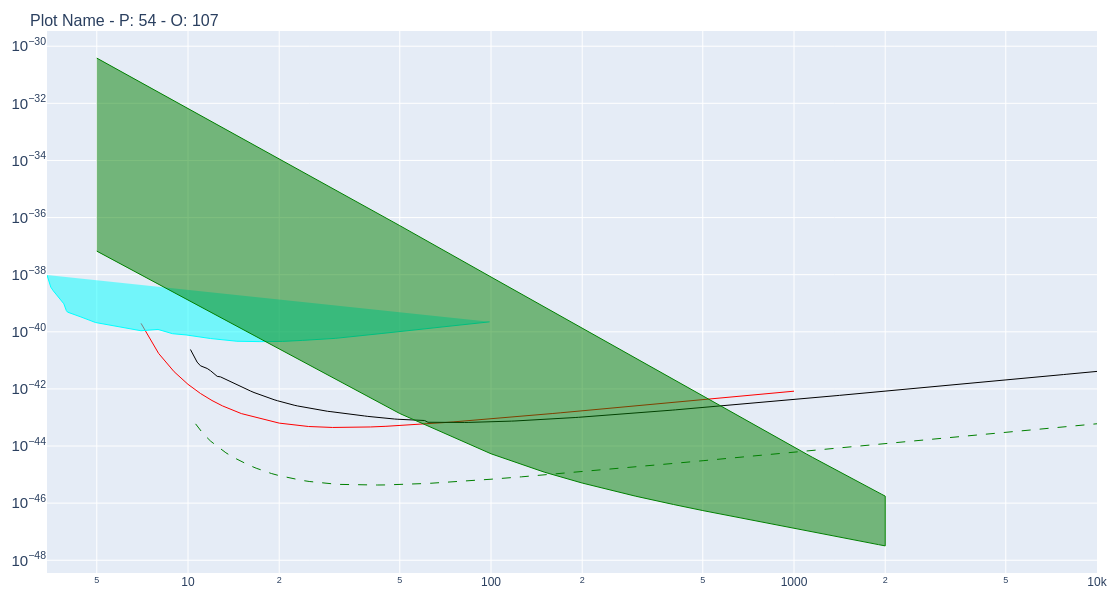

In [172]:
def create_actual_plot(plot_name_in, plot_id_in, old_plot_id_in, data_display_df_in, data_data_df_in):
    ## requirement to keep plots square
    #if screen_height_in > screen_width_in:
    #    plot_square_dimensions =
    #plot_square_dimensions = self.screen_height / 2
    plot_square_dimensions = 600

    m1 = go.layout.Margin(l=20,r=10,b=20,t=20,pad=0)
    hw = go.Layout(autosize=False,width=plot_square_dimensions,height=plot_square_dimensions)
    y_title_text = r"$\text{Cross Section [cm}^{2}\text{] (normalized to nucleon)}$"

    y1 = go.layout.YAxis(#title=y_title_text,
                        title_standoff = 0,
                        #range=[start_y_range,stop_y_range],
                        type="log",
                        titlefont=go.layout.yaxis.title.Font(color='SteelBlue'))

    x_title_text = r"$\text{WIMP Mass [GeV}/c^{2}]$"
    x1 = go.layout.XAxis(#title=x_title_text,
                        title_standoff = 0,
                        type="log",
                        #type="linear",
                        #range=[start_x_range,stop_x_range],
                        titlefont=go.layout.xaxis.title.Font(color='SteelBlue'))


    ##title1=go.layout.Title(text="Dark Matter Detection Results")

    fig_chart_populated = go.Figure(
        data=[go.Scatter(x=[], y=[])],
        layout=go.Layout(
            margin=m1,
            yaxis= y1,
            xaxis= x1
        )
    )

    plot_title = plot_name_in + " - P: " + str(plot_id_in) + " - O: " + str(old_plot_id_in)

    fig_chart_populated.update_layout(
        title=dict(text=plot_title ,font=dict(size=16),automargin=True,yref='paper')
    )

    fig_chart_populated.update_layout(hw)

    for index, row in data_display_df_in.iterrows():
        #print(row['limit_id'])
        data_id_selected = row['data_id']
        #print('selected data_id >>', data_id_selected)
        #data_about_selected_df = self.data_about_df[self.data_about_df['data_id']==data_id_selected].copy()
        data_display_selected_df_in = data_display_df_in[data_display_df_in['data_id']==data_id_selected].copy()
        data_data_selected_df_in = data_data_df_in[data_data_df_in['data_id']==data_id_selected].copy()
        trace_list_refs = data_data_selected_df_in[['data_id','trace_id','trace_name']].copy()
        trace_list = trace_list_refs.drop_duplicates()
        trace_style = data_display_selected_df_in['style'].iloc[0]
        trace_color = data_display_selected_df_in['color'].iloc[0]
        tc = TraceClass()
        tc.set_values(trace_color, trace_style)
        for index, row in trace_list.iterrows():
            #print(row)
            trace_data = data_data_df[(data_data_df['data_id']==row['data_id']) & (data_data_df['trace_id']==row['trace_id'])]
            #print(trace_data)
            #print("trace_data >>>>" , trace_data)
            trace_name = row['trace_name']
            fig_chart_populated.add_trace(go.Scatter(tc.__dict__,
                                              x=trace_data['masses'],
                                              y=trace_data['cross_sections'],
                                              name=trace_name,
                                                      showlegend=False
                                                  ))
    return fig_chart_populated
fig_chart_1 = create_actual_plot('Plot Name', plot_id, old_plot_id, data_display_df, data_data_df )
fig_chart_1.show()

In [169]:
'''
## are we happy with hover template now data is 5 decimal places?
hovertemplate =
                                               '<i><b>Cross Section</b></i>: %{y:.4E}'+
                                                  '<br><b>Mass</b>: %{x}<br>',
showlegend=False,
'''

"\nhovertemplate =\n                                               '<i><b>Cross Section</b></i>: %{y:.4E}'+\n                                                  '<br><b>Mass</b>: %{x}<br>',\nshowlegend=False,\n"

In [170]:
limit_display_df

,id,limit_id,plot_id,color,style,updated_at,subject,row_id
0,457,273,107,r,line,201111101631,limit_display,0
1,458,136,107,g,dash,201001041902,limit_display,1
2,460,305,107,k,line,201001041910,limit_display,2
3,3216,407,107,c,fill,201107220146,limit_display,3
4,3217,216,107,ltg,fill,201107220145,limit_display,4


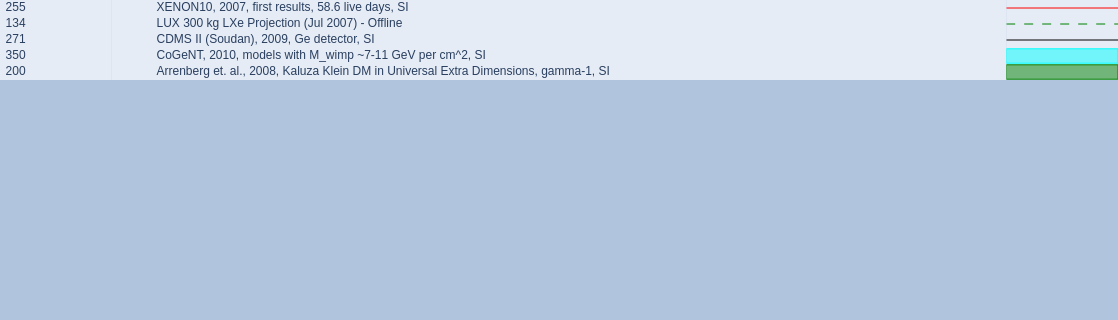

In [173]:
def create_populated_legend(data_display_df_in, data_df_in):
    rows_list = list(range(1,20))
    cols_list = list(range(1,4))

    table_rows=20
    table_cols=3
    #plot_square_dimensions = screen_height_in / 2
    legend_width = 600 ## this will be a maximum and will shrink if screen size < 800
    legend_height = 20 * 16
    fig_chart_legend = make_subplots(
                      column_titles = ['data_id','format'],
                      rows=table_rows,
                      cols=table_cols,
                      horizontal_spacing = 0.00,
                      vertical_spacing = 0.00,
                      #subplot_titles=(titles)
                      column_widths=[0.1,0.8,0.1])

    fig_chart_legend.update_layout(
        #    autosize=False,
            width=legend_width,
            height=legend_height,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=0
            ),
            paper_bgcolor="LightSteelBlue",
        )

    fig_chart_legend.update_xaxes(showgrid=False)
    fig_chart_legend.update_yaxes(showgrid=False)
    #legend
    fig_chart_legend.update_layout(showlegend=False)
    #x axis
    fig_chart_legend.update_xaxes(visible=False)
    #y axis
    fig_chart_legend.update_yaxes(visible=False)

    fig_chart_legend.data = []
    #fig_legend_out.show()

    # Any changes to the fig must be applied to the DataFrame as the dataframe
    # will be used when the plot is saved.
    # Saving zoom is still to be implemented

    #print("CD : data_display_df>>>>>>>>>", data_display_df_in)

    display_legend_df = data_display_df_in[['data_id','color','style']].copy()
    display_legend_df.drop_duplicates(inplace=True)

    rowloop = 1
    for index, row in display_legend_df.iterrows():
        data_selected_df = data_df_in[data_df_in['id']==row['data_id']].copy()
        trace_name = data_selected_df['data_label'].iloc[0]
        for c in cols_list: #enumerate here to get access to i
            # STEP 2, notice position of arguments!
            #table_column_names = ['data_id','data_label','format']
            scatter_mode_list = ['text-number','text-text','format']
            table_column_names = ['data_id','trace_name','format']
            trace_style = row['style']
            trace_color = row['color']
            data_id = row['data_id']
            tc = TraceClass()
            tc.set_values(trace_color, trace_style)
            #tc.set_row_col(rowloop, c)
            #scatter_mode_list = ['text-number','text-text','format']
            #current_column = table_column_names[c-1]
            #current_mode = scatter_mode_list[c-1]
            current_column = table_column_names[c-1]
            current_mode = scatter_mode_list[c-1]
            #print(rowloop,current_column, current_mode )
            if current_mode =='format':
                mode = tc.__dict__['mode']
                #fill = 'toself'
                fill = tc.__dict__['fill']
                if mode == 'lines' and fill == 'none':
                    x_data = [0,1]
                    y_data = [0.5,0.5]
                elif mode == 'lines' and fill == 'toself':
                    x_data = [0,1,1,0,0]
                    y_data = [0,0,1,1,0]
                else:
                    x_data = [0,1]
                    y_data = [0.5,0.5]

                fig_chart_legend.add_trace(go.Scatter(tc.__dict__,x=x_data,
                                            y=y_data),
                              row=rowloop, #index for the subplot, i+1 because plotly starts with 1
                              col=c)

            if current_mode =='text-number':
                fig_chart_legend.add_trace(go.Scatter(x=[1,2],
                                          textposition='middle right',
                                          y=[1,1],
                                          mode='text',
                                          text=[str(data_id),'']
                                        ),
                              row=rowloop, #index for the subplot, i+1 because plotly starts with 1
                              col=c)
            if current_mode =='text-text':
                fig_chart_legend.add_trace(go.Scatter(x=[1,2],
                                          textposition='middle right',
                                          y=[1,1],
                                          mode='text',
                                          text=[trace_name,'']
                                        ),
                              row=rowloop, #index for the subplot, i+1 because plotly starts with 1
                              col=c)

        rowloop=rowloop+1
        fig_chart_legend.update_xaxes(showgrid=False)
        fig_chart_legend.update_yaxes(showgrid=False)
        #legend
        fig_chart_legend.update_layout(showlegend=False)
        #x axis
        fig_chart_legend.update_xaxes(visible=False)
        #y axis
        fig_chart_legend.update_yaxes(visible=False)

    return fig_chart_legend

legend_fig = create_populated_legend(data_display_df, data_df)
legend_fig.show()